# Projectile motion

*This is an example of a solution for our projectile motion investigation. This notebook shows a possible final state, NOT the process of developing it.*

## The question
We are trying to throw an object as far as possible. What is the optimal angle?

## The process
1. Decide on a model.
1. Implement it.
1. Run the simulation, collect data.
1. Visualize the data for evaluation.
1. Possibly change parameters (promising angles) and repeat the process.
1. Decide on a (reasonably precise) result.
1. Write a conclusion.

## The model
We do not want to simulate the whole universe, so we make some assumptions. Our work will become much easier, without distorting the results and conclusions too much.

* We assume we are on Earth.
 * Gravitational pull is constant.
 * Our throw is negligible in comparison to the diameter of the planet.
* The object we throw is a **MASSIVE** point: no size, so no balance, no rotation, no friction...

We describe the position of the point using carthesian coordinates.
The point moves according to the horizontal and vertical components of its velocity. The vertical velocity is changed by gravity.

We set the initial height to $100\ m$, to make things more interesting.

In [37]:
G = -9.81  # Gravity
v_0 = 10.0  # Initial velocity (m/s)
height_0 = 100 # Initial height (m)


## The simulation



### One throw
We will simulate the motion step by step, calculating the new state based on the previous one, after a defined time step, e.g.:

$x_{new} = x_{old} + velocity_x⋅timestep$

In [38]:
timestep = 0.1 # delay between simulated steps (s)

We create a dedicated function to simulate the throw to keep the code organized.

In [39]:
import math

def sim(y, v_0, angle_degrees):
    x = 0
    angle = math.radians(angle_degrees)  # Convert angle from degrees to radians
    v_x = v_0 * math.cos(angle)  # Horizontal velocity
    v_y = v_0 * math.cos(math.pi/2 - angle)  # Vertical velocity
    trajectory_x = []  # Lists to store positions
    trajectory_y = []

    while y >= 0:  # Loop to calculate motion as long as the object flies
        trajectory_x.append(x)  # Store position
        trajectory_y.append(y)
        x += v_x * timestep  # Update position based on horizontal velocity
        y += v_y * timestep
        v_y += G * timestep  # Update vertical velocity based on gravity

    trajectory_x.append(x)  # Append final position (on or under ground)
    trajectory_y.append(y)

    return trajectory_x, trajectory_y, angle_degrees  # Return coordinate lists

### Multiple throws

We run the simulation for a predefined set of angles to see which yields the longest throw.

In [40]:
angles = list(range(10, 80, 5))

Now finally, run the simulation. We try each angle and store the resulting trajectories in a list.

In [41]:
results = []  # List of resulting trajectories (pairs of lists of x an y coordinates)
for angle in angles:
    results.append(sim(height_0, v_0, angle))

## Visualization
We have the list of coordinates. Now the grand finale: we plot it.

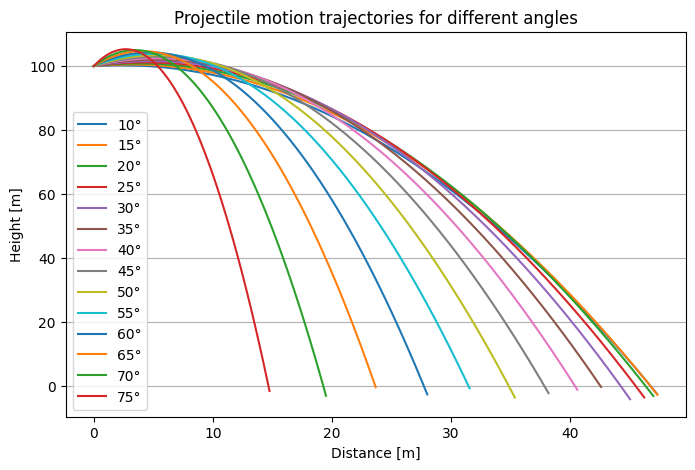

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5)) # Create the plot

for result in results:
    plt.plot(result[0], result[1], label=str(result[2])+"°")
plt.title("Projectile motion trajectories for different angles")  # Set title
plt.xlabel("Distance [m]")  # Set x-axis label
plt.ylabel("Height [m]")  # Set y-axis label
plt.grid(axis='y')  # Add grid lines only along the x-axis
plt.legend()  # Show legend

plt.show()

We need to zoom in to the lower right corner.

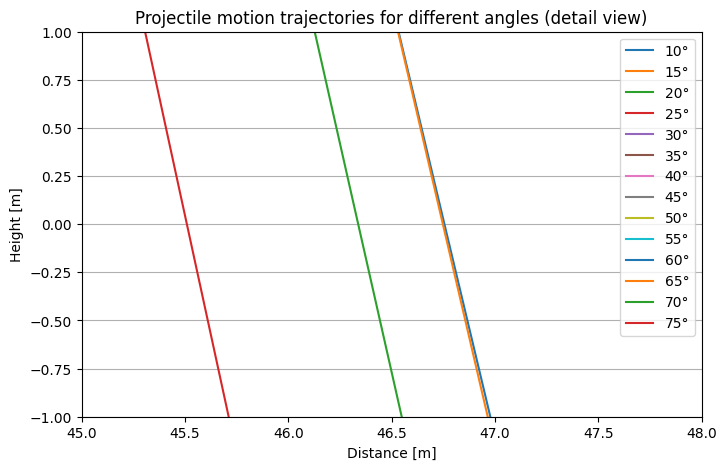

In [ ]:
plt.figure(figsize=(8, 5))

plt.xlim(45, 48) # this is the new part (these parameters work for 100 m height and 10 m/s initial velocity)
plt.ylim(-1,1)  # this is the new part

for result in results:
    plt.plot(result[0], result[1], label=str(result[2])+"°")
plt.title("Projectile motion trajectories for different angles (detail view)")
plt.xlabel("Distance [m]")
plt.ylabel("Height [m]")
plt.grid(axis='y')
plt.legend()
plt.show()

The last figure shows us that the optimal angle is between $6°$ and $18°$.

## Second run simulation
Let us rerun the simulation once again, focused better on promising angles. We do not need the old values anymore, so we rewrite them. We copy the code to document the process of finding the answer. (We could have also just plug the better values into the initial simulation and "pretend" to find the answer on the first try.)

In [44]:
angles = list(range(6, 18, 1))
results = []  # List of resulting trajectories (pairs of lists of x an y coordinates)
for angle in angles:
    results.append(sim(height_0, v_0, angle))

# Second run visualization

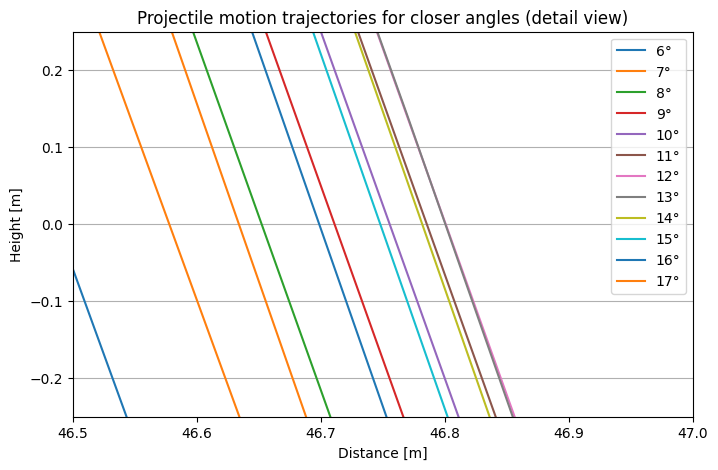

In [ ]:
plt.figure(figsize=(8, 5))
plt.xlim(46.5, 47) # again, these parameters work for 100 m height and 10 m/s initial velocity
plt.ylim(-.25,.25)
for result in results:
    plt.plot(result[0], result[1], label=str(result[2])+"°")
plt.title("Projectile motion trajectories for closer angles (detail view)")
plt.xlabel("Distance [m]")
plt.ylabel("Height [m]")
plt.grid(axis='y')
plt.legend()
plt.show()

## Evaluation

A close look reveals that the pink ($12°$) and the grey ($13°$) line overlap and they are the furthest to the right, reaching the highest distance among simulated angles. Other trajectories recede to the left in pairs ($11°$ with $14°$ and so on).

## Result

Based on the results of our simulation, we can conclude that the optimal angle to throw an object from $100\ m$ at $10\ ms^{-1}$ is between $12°$ and $13°$, likely near $12,5°$. This is under the assumptions listed above, namely Earth with the atmosphere lost.

Whether this matches other methods, e.g. direct analytical calculation and experimentation, is yet to be determined.